# Running Cloud GPUs

> Creating our LLM environment in a cloud GPU for Fine-Tuning.

There are many companies that provide access to GPUs in the Cloud. In this Notebook we use a service called Paperspace for its mix of ease and flexibility.  


First, let's go over some cloud providers to see different options and use-cases: 
- Google Colab.   
- Lambda Labs.   
- Paperspace.  

There are many more options with different pricing and features, but these three cover a solid range of usability and price. 

[Lambda Labs](https://lambdalabs.com/) is one of the more popular GPU cloud providers. It has great pricing options. Unfortunately, this combo of popularity and low costs means that their GPUs are often unavailable. Making an account and launching GPUs, when one *is* open, is incredibly fast and straightfoward.  

[Paperspace](https://www.paperspace.com/) offers cloud GPUs in two different, complementary ways. Their platform called Gradient is built around Notebooks and is tailored for ML and scientific experiments. Their CORE service has more low-level options, allowing you to build and deploy a custom VM with a GPU. Paperspace generally has better availability than Lambda Labs.    

[Colab](https://colab.google/) is an option from Google. It is built around their own flavor of Notebooks that are very similar to Jupyter's. One of Colab's most useful features is the ability to directly load any Notebook straight from your Git repos. It's a convenient and flexible option without the overhead effort of Lambda or Paperspace.   


> Note: the cloud GPU scene changes fast. The points above about cost or availability are rules of thumb. Actual uptime and costs change all the time. 


## Launching a GPU VM with Paperspace

We picked Paperspace because it lets us deploy custom VMs. It's not as easy to use as Colab. But, we'll have the option to build the LLM environment for fine-tuning LLMs.

[Sign up](https://console.paperspace.com/signup) for a Paperspace account or log in if you already have one. After logging in, you should land at a similar page to this one:

![](imgs/paperspace_startup.png)

The `Create a Machine` button takes us to the page to setup and deploy the VM.

One of the first options is picking which OS the VM will run. We'll pick Ubuntu 22.04 to leverage its latest updates and improvements.

![](imgs/paperspace_os_choice.png)

Next we can pick which type of GPU the VM will get. Here I picked the `Quadro M4000` which is the cheapest option as of writing, costing $0.45 an hour. 

![](imgs/paperspace_gpu_choice.png)

Below some back-of-the-napkin math around what it costs to run the machine for different times, since this is  always good to keep this in mind.

In [13]:
# price for an hour of Quadro M4000 use
price_per_hour = 0.45

# leaving the machine on for a day
day_cost = 24 * price_per_hour

# leaving it on for a week
week_cost = 7 * day_cost

# leaving it up for a month
month_cost = 4 * week_cost

print(f"""
Quadro M4000 Costs:
Hour:  ${price_per_hour:.2f}
Day:   ${day_cost:.2f}
Week:  ${week_cost:.2f}
Month: ${month_cost:.2f}
""")


Quadro M4000 Costs:
Hour:  $0.45
Day:   $10.80
Week:  $75.60
Month: $302.40



Leaving it on for a full day isn't too bad. But the cost rise quickly as we leave the machine on for longer. This gets even worse with more expensive machines. Thankfully, the fine-tuning we'll be doing should fit well within a day. 

### Connecting to the VM

Next we get to pick between two way of connecting to the VM.  

![](imgs/paperspace_vm_connect_opts.png)

In this case we will use the [`ssh`](https://arjunaravind.in/blog/learning-and-using-ssh/) option.

Below are two good options for SSH setup tutorials. The first is this text-based [Lambda Labs SSH tutorial](https://lambdalabs.com/blog/getting-started-with-lambda-cloud-gpu-instances). The second is a video from Paperspace embedded below.

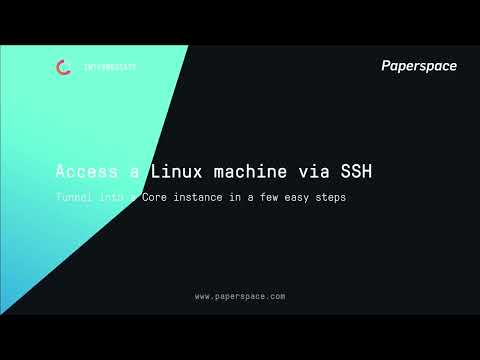

In [4]:
#| hide
# embedding Paperspace's youtube ssh tutorial directly in a Notebook
from IPython.display import YouTubeVideo
YouTubeVideo('3E_C4H8XSGg', width=700, height=400)


We're almost done. At the bottom of the page, Paperspace breakdowns the VM configuration and its cost. If the summary looks good, go ahead and click the `Create` button to deploy the cloud VM.

> Note: There is also an "Advanced options" section with more low-level options for the VM.

![](imgs/paperspace_cost_summary.png)

Next, we have to start the VM before we connect to it. After following the SSH tutorials you should have your own  key. Add it under the `SSH Keys` section of your Paperspace account as shown below:

![](imgs/paperspace_ssh_key.png)

Start the machine by clicking `Connect` from the main page:

![](imgs/paperspace_machine_page.png)

Once we connect to the machine, we need to install the nvidia drivers. This is the software that lets our Machine Learning algorithms take full advantage of the GPU.

Here is an [excellent and clear guide](https://gist.github.com/denguir/b21aa66ae7fb1089655dd9de8351a202) to install the nvidia drivers.  

### Alternative to NVIDIA Driver Installation

Paperspace offers a ready-to-go VM option. It's called `ML-In-A-Box`, and already includes the nvidia drivers. It's a great option if you want to skip the driver installation step.  

It doesn't install the latest version of the drivers, but it's a great option to get started quickly. We can also always install drivers later.

Here is a screenshot with both types of Machines: custom and `ML-In-A-Box`:
![](imgs/paperspace_both_types.png)